<a href="https://colab.research.google.com/github/Ryan-Shaik/Computer_Vision/blob/index.edit/PyTorch_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and Modules

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


### Define transformer

In [ ]:
# Transform to a PyTorch tensors and the normalize our valeus between -1 and +1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

### Download MNIST Dataset

In [ ]:
# download Trainind data and specify what transform to use when loading
trainset = torchvision.datasets.MNIST("mnist",
                                      train = True,
                                      download = True,
                                      transform = transform)


# download Test data and specify what transform to use when loading

testset = torchvision.datasets.MNIST("mnist",
                                     train = False,
                                     download = True,
                                     transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4028276.73it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 133285.90it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 245388.75it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2929949.06it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



### Inspect a sample of training data

In [ ]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


### Looking at individual sample of data

In [ ]:
print(trainset.data[2].shape)
print(trainset.data[2])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0],
        [  0,   0,   0,  

### Plot using OpenCV

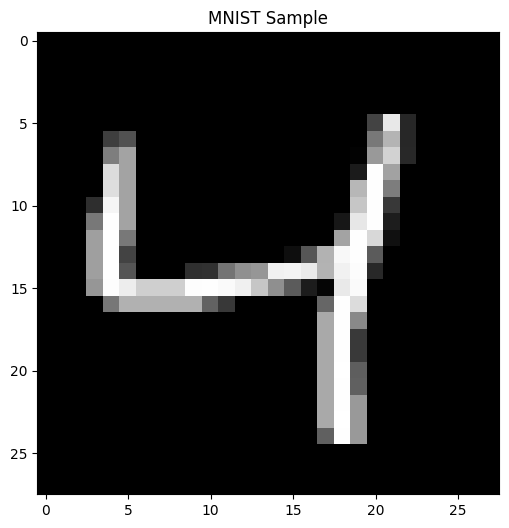

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imgshow(title="", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Convert image to a numpy array
image = trainset.data[2].numpy()
imgshow("MNIST Sample", image)

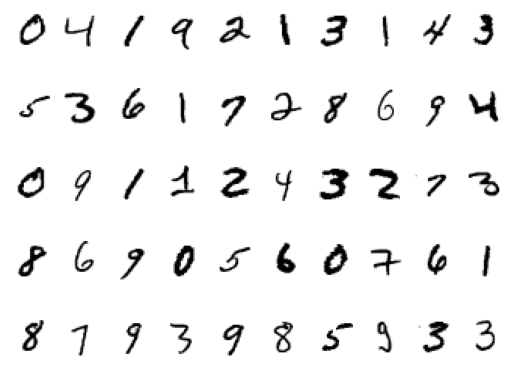

In [ ]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(trainset.data[index], cmap='gray_r')

### Create Data Loader

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,
                                         batch_size = 128,
                                         shuffle = True,
                                         num_workers = 0)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = 128,
                                         shuffle = False,
                                         num_workers = 0)

### Using Iter and Next() for load batches

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [ ]:
images[0].shape

torch.Size([1, 28, 28])

### **Alterantively PyTorch provides it's own Image Plotting Tool**

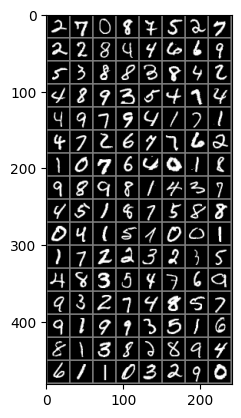

27087527228446695388384248935474497941714726776210764018989814374518758804151001172232354835476993274857919935168138289461103290


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(''.join('%1s' % labels[j].numpy() for j in range(128)))

### 6. Now we build our Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### Defining Loss Function and Optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr =0.001, momentum = 0.9)

### Training our model

In [ ]:
# We loop over the traing dataset multiple times (each time is called an epoch)
epochs = 10

# Create some empty arrays to store logs
epoch_log = []
loss_log = []
accuracy_log = []

# Iterate for a specified number of epochs
for epoch in range(epochs):
    print(f'Starting Epoch: {epoch+1}...')

    # We keep adding or accumulating our loss after each mini-batch in running_loss
    running_loss = 0.0

    # We iterate through our trainloader iterator
    # Each cycle is a minibatch
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Move our data to GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Clear the gradients before training by setting to zero
        # Required for a fresh start
        optimizer.zero_grad()
        net.train()
        # Forward -> backprop + optimize
        outputs = net(inputs) # Forward Propagation
        loss = loss_fn(outputs, labels) # Get Loss (quantify the difference between the results and predictions)
        loss.backward() # Back propagate to obtain the new gradients for all nodes
        optimizer.step() # Update the gradients/weights

        # Print Training statistics - Epoch/Iterations/Loss/Accuracy
        running_loss += loss.item()
        if i % 50 == 49:    # show our loss every 50 mini-batches
            correct = 0 # Initialize our variable to hold the count for the correct predictions
            total = 0 # Initialize our variable to hold the count of the number of labels iterated

            # We don't need gradients for validation, so wrap in
            # no_grad to save memory
            with torch.inference_mode():
                net.eval()
                # Iterate through the testloader iterator
                for data in testloader:
                    images, labels = data
                    # Move our data to GPU
                    images = images.to(device)
                    labels = labels.to(device)

                    # Foward propagate our test data batch through our model
                    outputs = net(images)

                     # Get predictions from the maximum value of the predicted output tensor
                     # we set dim = 1 as it specifies the number of dimensions to reduce
                    _, predicted = torch.max(outputs.data, dim = 1)
                    # Keep adding the label size or length to the total variable
                    total += labels.size(0)
                    # Keep a running total of the number of predictions predicted correctly
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0

    # Store training stats after each epoch
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 0.074, Test Accuracy = 97.970%
Epoch: 1, Mini-Batches Completed: 100, Loss: 0.072, Test Accuracy = 97.880%
Epoch: 1, Mini-Batches Completed: 150, Loss: 0.062, Test Accuracy = 97.870%
Epoch: 1, Mini-Batches Completed: 200, Loss: 0.069, Test Accuracy = 97.990%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.064, Test Accuracy = 98.130%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.064, Test Accuracy = 97.930%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.068, Test Accuracy = 97.980%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.063, Test Accuracy = 98.110%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.057, Test Accuracy = 98.090%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.059, Test Accuracy = 98.150%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.051, Test Accuracy = 98.170%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.070, Test Accuracy = 97.910%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.0

### Saving model

In [ ]:
PATH = "./mnist_cnn_net.pth"
torch.save(net.state_dict(), PATH)

### Let's look at some images from your Test Data and view their Ground Truth labels

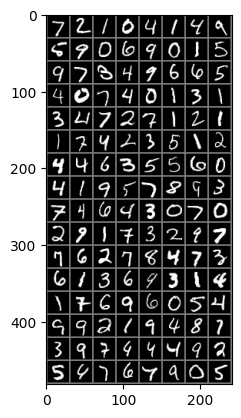

GroundTruth:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873974449254767905


In [ ]:
# Loading one mini-batch
data = iter(testloader)
images, labels = next(data)

# Display images using torchvision's utils.make_grid()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',''.join('%1s' % labels[j].numpy() for j in range(128)))

### Reload the model we saved

In [ ]:
net = Net()
net.to(device)

net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### Getting Predictions

In [ ]:
## Let's forward propagate one mini-batch and get the predicted outputs
# We use the Python function iter to return an iterator for our train_loader object
test_iter = iter(testloader)

# We use next to get the first batch of data from our iterator
images, labels = next(test_iter)

# Move our data to GPU
images = images.to(device)
labels = labels.to(device)

outputs = net(images)

# Get the class predictions using torch.max
_, predicted = torch.max(outputs, 1)

# Print our 128 predictions
print('Predicted: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))

Predicted:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873979449254767905


### Showing Test Accuracy

In [ ]:
correct = 0
total = 0

with torch.inference_mode():
    for data in testloader:
        images,labels = data

        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')


Accuracy of the network on the 10000 test images: 98.5%


### Plotting our training logs

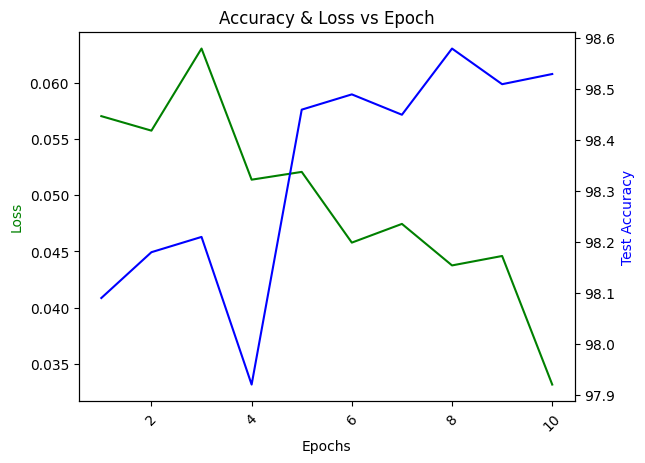

In [ ]:
# To create a plot with secondary y-axis we need to create a subplot
fig, ax1 = plt.subplots()

# Set title and x-axis label rotation
plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

# We use twinx to create a plot a secondary y axis
ax2 = ax1.twinx()

# Create plot for loss_log and accuracy_log
ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

# Set labels
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

Actual Label: 9, Predicted Label: 4


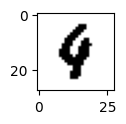

Actual Label: 5, Predicted Label: 6


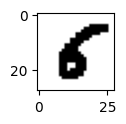

Actual Label: 2, Predicted Label: 4


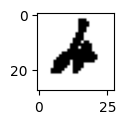

Actual Label: 0, Predicted Label: 6


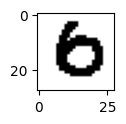

Actual Label: 7, Predicted Label: 2


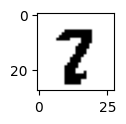

Actual Label: 3, Predicted Label: 5


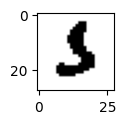

Actual Label: 0, Predicted Label: 6


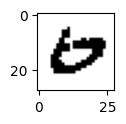

Actual Label: 5, Predicted Label: 3


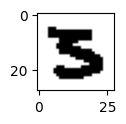

Actual Label: 2, Predicted Label: 8


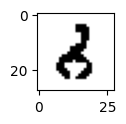

Actual Label: 7, Predicted Label: 2


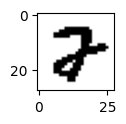

Actual Label: 1, Predicted Label: 2


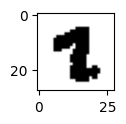

Actual Label: 9, Predicted Label: 4


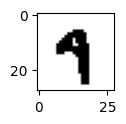

Actual Label: 3, Predicted Label: 8


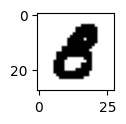

Actual Label: 7, Predicted Label: 8


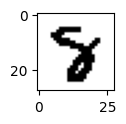

Actual Label: 9, Predicted Label: 7


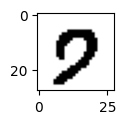

Actual Label: 9, Predicted Label: 4


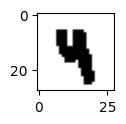

Actual Label: 7, Predicted Label: 9


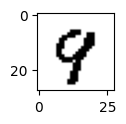

Actual Label: 5, Predicted Label: 3


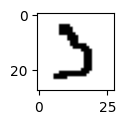

Actual Label: 9, Predicted Label: 8


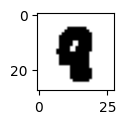

Actual Label: 2, Predicted Label: 1


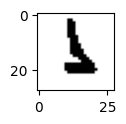

Actual Label: 5, Predicted Label: 6


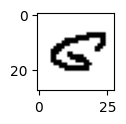

Actual Label: 1, Predicted Label: 7


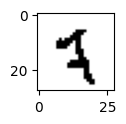

Actual Label: 1, Predicted Label: 6


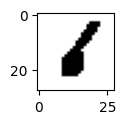

Actual Label: 5, Predicted Label: 6


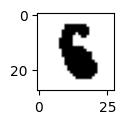

Actual Label: 2, Predicted Label: 7


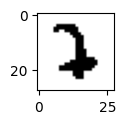

Actual Label: 4, Predicted Label: 9


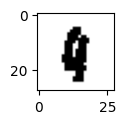

Actual Label: 9, Predicted Label: 4


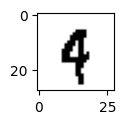

Actual Label: 5, Predicted Label: 9


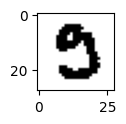

Actual Label: 0, Predicted Label: 8


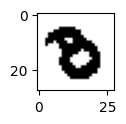

Actual Label: 2, Predicted Label: 8


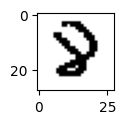

Actual Label: 3, Predicted Label: 5


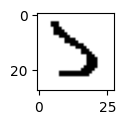

Actual Label: 7, Predicted Label: 9


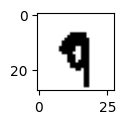

Actual Label: 9, Predicted Label: 7


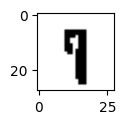

Actual Label: 5, Predicted Label: 1


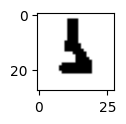

Actual Label: 7, Predicted Label: 8


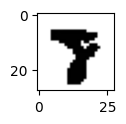

Actual Label: 3, Predicted Label: 9


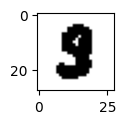

Actual Label: 3, Predicted Label: 2


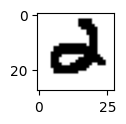

Actual Label: 6, Predicted Label: 0


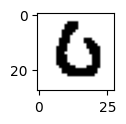

Actual Label: 9, Predicted Label: 4


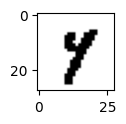

Actual Label: 0, Predicted Label: 2


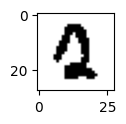

Actual Label: 5, Predicted Label: 9


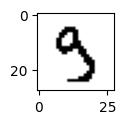

Actual Label: 0, Predicted Label: 8


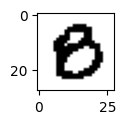

Actual Label: 8, Predicted Label: 2


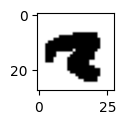

Actual Label: 3, Predicted Label: 8


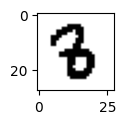

Actual Label: 4, Predicted Label: 9


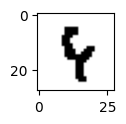

Actual Label: 7, Predicted Label: 1


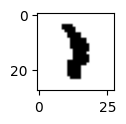

Actual Label: 3, Predicted Label: 5


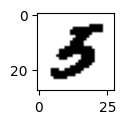

Actual Label: 0, Predicted Label: 2


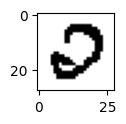

Actual Label: 0, Predicted Label: 6


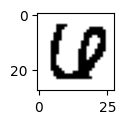

Actual Label: 9, Predicted Label: 4


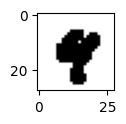

Actual Label: 1, Predicted Label: 6


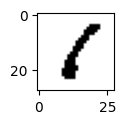

Actual Label: 0, Predicted Label: 8


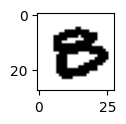

Actual Label: 5, Predicted Label: 3


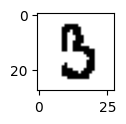

Actual Label: 0, Predicted Label: 9


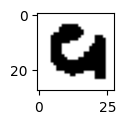

Actual Label: 3, Predicted Label: 5


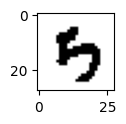

Actual Label: 3, Predicted Label: 8


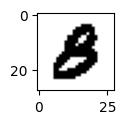

Actual Label: 4, Predicted Label: 9


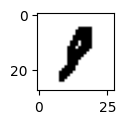

Actual Label: 9, Predicted Label: 4


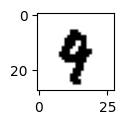

Actual Label: 5, Predicted Label: 6


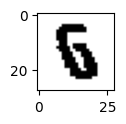

Actual Label: 0, Predicted Label: 2


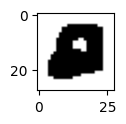

Actual Label: 4, Predicted Label: 2


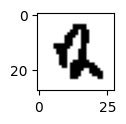

Actual Label: 9, Predicted Label: 4


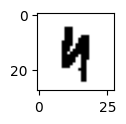

Actual Label: 3, Predicted Label: 5


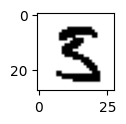

Actual Label: 1, Predicted Label: 6


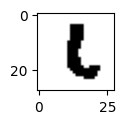

Actual Label: 9, Predicted Label: 4


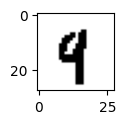

Actual Label: 0, Predicted Label: 8


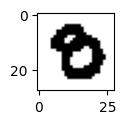

Actual Label: 5, Predicted Label: 9


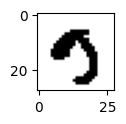

Actual Label: 5, Predicted Label: 3


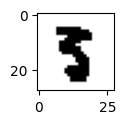

Actual Label: 5, Predicted Label: 6


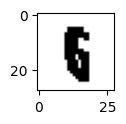

Actual Label: 5, Predicted Label: 8


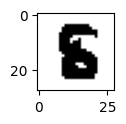

Actual Label: 0, Predicted Label: 6


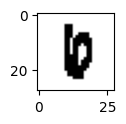

Actual Label: 7, Predicted Label: 9


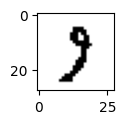

Actual Label: 2, Predicted Label: 1


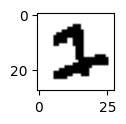

Actual Label: 3, Predicted Label: 8


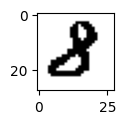

Actual Label: 5, Predicted Label: 6


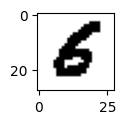

Actual Label: 9, Predicted Label: 8


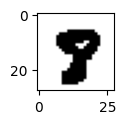

Actual Label: 3, Predicted Label: 2


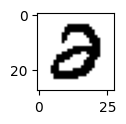

Actual Label: 0, Predicted Label: 6


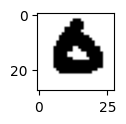

Actual Label: 1, Predicted Label: 9


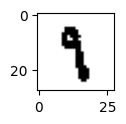

Actual Label: 4, Predicted Label: 6


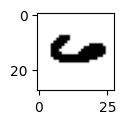

Actual Label: 5, Predicted Label: 6


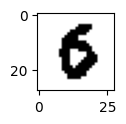

Actual Label: 0, Predicted Label: 5


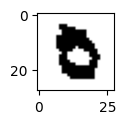

Actual Label: 5, Predicted Label: 8


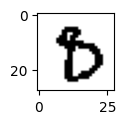

Actual Label: 7, Predicted Label: 0


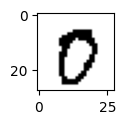

Actual Label: 3, Predicted Label: 9


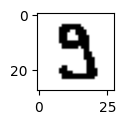

Actual Label: 9, Predicted Label: 4


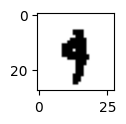

Actual Label: 9, Predicted Label: 8


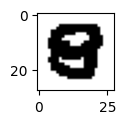

Actual Label: 2, Predicted Label: 4


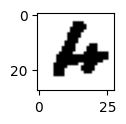

Actual Label: 3, Predicted Label: 1


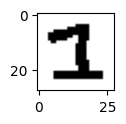

Actual Label: 2, Predicted Label: 4


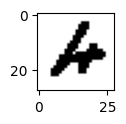

Actual Label: 5, Predicted Label: 6


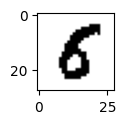

Actual Label: 2, Predicted Label: 0


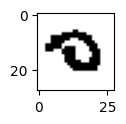

Actual Label: 0, Predicted Label: 8


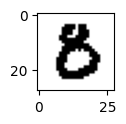

Actual Label: 3, Predicted Label: 9


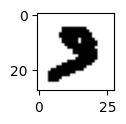

Actual Label: 0, Predicted Label: 9


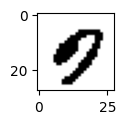

Actual Label: 7, Predicted Label: 2


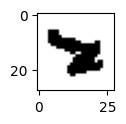

Actual Label: 7, Predicted Label: 1


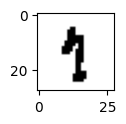

Actual Label: 7, Predicted Label: 9


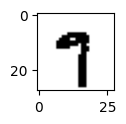

Actual Label: 3, Predicted Label: 7


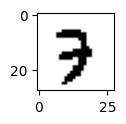

Actual Label: 8, Predicted Label: 2


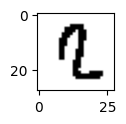

Actual Label: 8, Predicted Label: 2


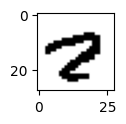

Actual Label: 7, Predicted Label: 8


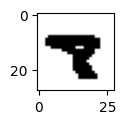

Actual Label: 5, Predicted Label: 6


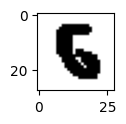

Actual Label: 9, Predicted Label: 8


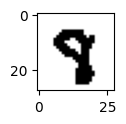

Actual Label: 7, Predicted Label: 8


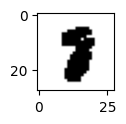

Actual Label: 0, Predicted Label: 8


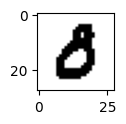

Actual Label: 0, Predicted Label: 6


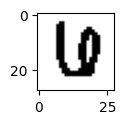

Actual Label: 9, Predicted Label: 4


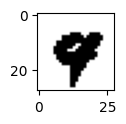

Actual Label: 4, Predicted Label: 8


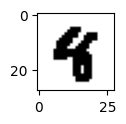

Actual Label: 7, Predicted Label: 8


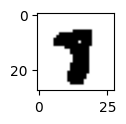

Actual Label: 3, Predicted Label: 2


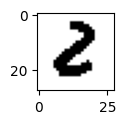

Actual Label: 6, Predicted Label: 1


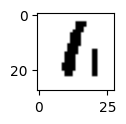

Actual Label: 9, Predicted Label: 7


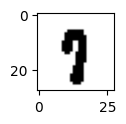

Actual Label: 5, Predicted Label: 1


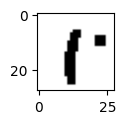

Actual Label: 5, Predicted Label: 8


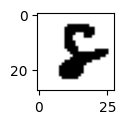

Actual Label: 0, Predicted Label: 7


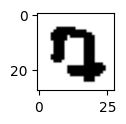

Actual Label: 3, Predicted Label: 5


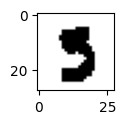

Actual Label: 9, Predicted Label: 3


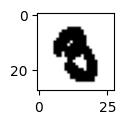

Actual Label: 5, Predicted Label: 9


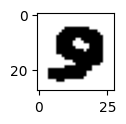

Actual Label: 3, Predicted Label: 9


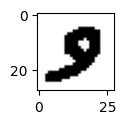

Actual Label: 0, Predicted Label: 9


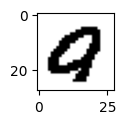

Actual Label: 5, Predicted Label: 0


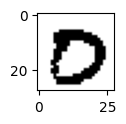

Actual Label: 7, Predicted Label: 9


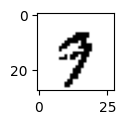

Actual Label: 1, Predicted Label: 7


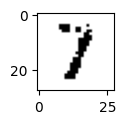

Actual Label: 7, Predicted Label: 0


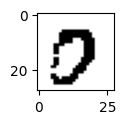

Actual Label: 7, Predicted Label: 8


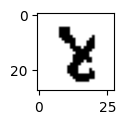

Actual Label: 8, Predicted Label: 0


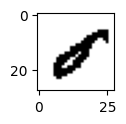

Actual Label: 9, Predicted Label: 8


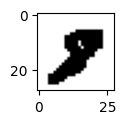

Actual Label: 6, Predicted Label: 1


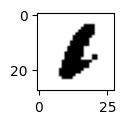

Actual Label: 4, Predicted Label: 6


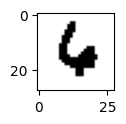

Actual Label: 7, Predicted Label: 8


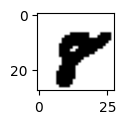

Actual Label: 3, Predicted Label: 8


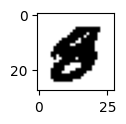

Actual Label: 1, Predicted Label: 2


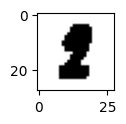

Actual Label: 4, Predicted Label: 6


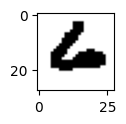

Actual Label: 6, Predicted Label: 0


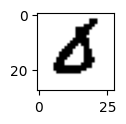

Actual Label: 6, Predicted Label: 8


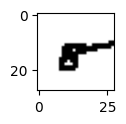

Actual Label: 9, Predicted Label: 4


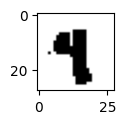

Actual Label: 9, Predicted Label: 4


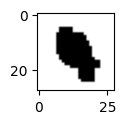

Actual Label: 2, Predicted Label: 7


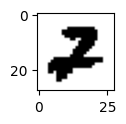

Actual Label: 2, Predicted Label: 7


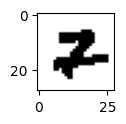

Actual Label: 5, Predicted Label: 8


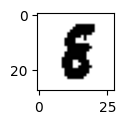

Actual Label: 3, Predicted Label: 0


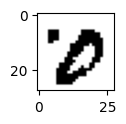

Actual Label: 7, Predicted Label: 9


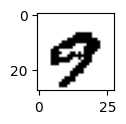

Actual Label: 7, Predicted Label: 9


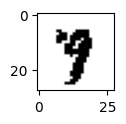

Actual Label: 6, Predicted Label: 5


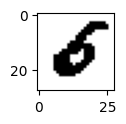

Actual Label: 3, Predicted Label: 2


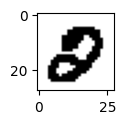

Actual Label: 0, Predicted Label: 5


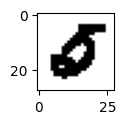

Actual Label: 3, Predicted Label: 2


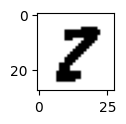

Actual Label: 5, Predicted Label: 8


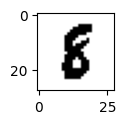

Actual Label: 7, Predicted Label: 2


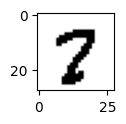

In [ ]:
net.eval()

# We don't need gradients for validation, so wrap in
# no_grad to save memory
with torch.inference_mode():
    for data in testloader:
        images, labels = data

        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Get our outputs
        outputs = net(images)

        # use torch.argmax() to get the predictions, argmax is used for long_tensors
        predictions = torch.argmax(outputs, dim=1)

        # For test data in each batch we identify when predictions did not match the label
        # then we print out the actual ground truth
        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {pred}, Predicted Label: {label}')
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), size = 1)